<a href="https://colab.research.google.com/github/Anuj-ipynb/Orinson3/blob/main/Internship3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis of Movie Reviews using NLP

##Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


###Loading the dataset and getting initial information

In [18]:
dataset = pd.read_csv('dataset.csv')
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [20]:
dataset.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


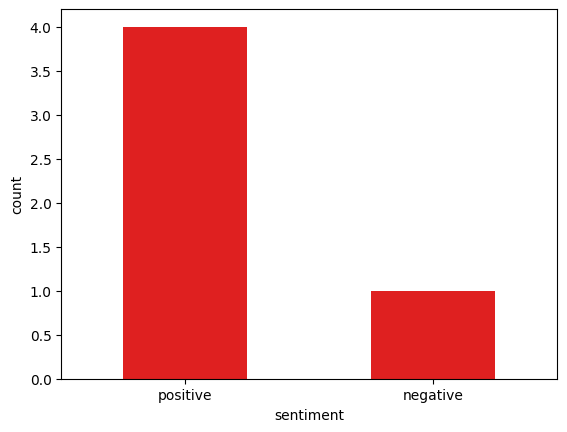

In [26]:
sns.countplot(x='sentiment', data=dataset.head(),color="red", width=0.5)

plt.show()

#Cleaning of data using NLP

In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = [stemmer.stem(word) for word in text.split() if word not in stop_words]  # Stem and remove stopwords
    return ' '.join(text)


dataset['cleaned_review'] = dataset['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
X = dataset['cleaned_review']
y = dataset['sentiment'].map({'positive': 1, 'negative': 0})  # Convert sentiments to binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Vectorization

In [15]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


##Training a classifier model on the training set

In [16]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)



MultinomialNB()

##Prediction and visualization

Accuracy: 84.86

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



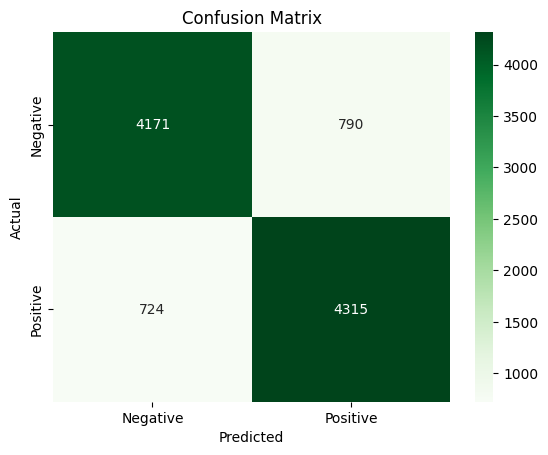

In [17]:

y_pred = model.predict(X_test_tfidf)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

